In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import statsmodels.api as sm


/Users/dorkyegg/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Iris dataset includes 50 samples each of 3 different flower species (150 total datapoints)
# each measurement has 4 attributes (150 x 4)

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
type(iris)

sklearn.datasets.base.Bunch

In [6]:
# this to be used later during regression
X = iris.data
Y = iris.target

In [7]:
type(X)

numpy.ndarray

In [8]:
type(Y)

numpy.ndarray

In [9]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [11]:
iris_target = DataFrame(Y,columns=['Species'])

In [12]:
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# species are labeled as 1,2,3 instead of species names
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [15]:
# use splot,apply,combine to change 1,2,3 to flower names (Setosa, Versicolor, Virginica)
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return 'Virginica'

In [16]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [18]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [19]:
# lets join data and target into one DataFrame
iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


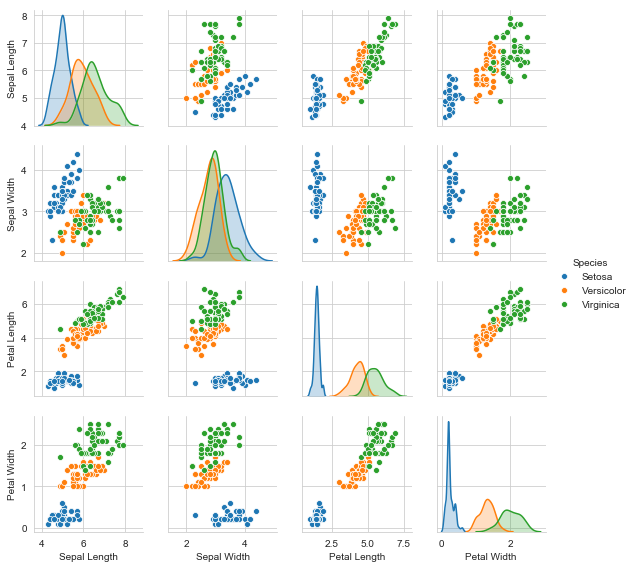

In [21]:
# lets do some visualizations
sns.pairplot(iris,hue='Species',height=2)

# observation - look for clustering to feel confident that classification will be successful

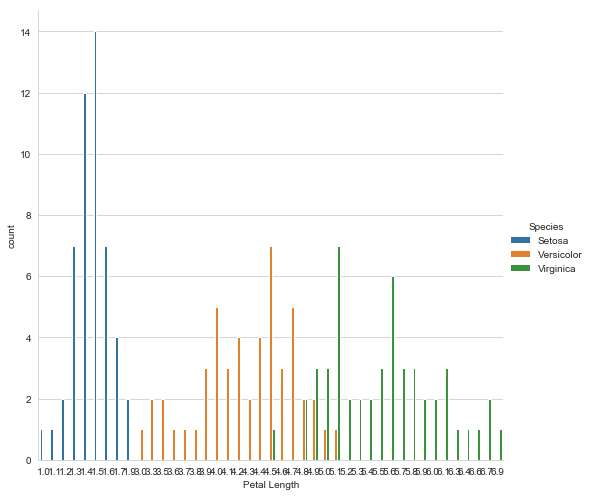

In [24]:
sns.catplot('Petal Length',data=iris,hue='Species',height=7,kind='count')

In [25]:
# now we'll use our sklearn imports for regression and training
logreg = LogisticRegression()

In [26]:
# this one forces test size outside of default 75:25 split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)

In [28]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
Y_pred = logreg.predict(X_test)

In [30]:
metrics.accuracy_score(Y_pred,Y_test)
# observation - looks very accurate!!
# should we trust it?  go back to the visuals to confirm

0.93333333333333335

In [50]:
## what if i want to manually enter data and receive a prediction?

# pass in an array with 4 vaues --> [Pedal Lgth, Pedal Width, Sepal Lgth, Sepal Width]
logreg.predict([5.5,2.7,4.0,1.5])

/Users/dorkyegg/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [51]:
# now let's use K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# need to specify K valuee
knn = KNeighborsClassifier(n_neighbors=6)

In [53]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [54]:
Y_pred = knn.predict(X_test)

In [55]:
metrics.accuracy_score(Y_pred,Y_test)
# observation - whoa, the prediction accuracy went up with K-Nearest Neighbors (with K=6)

0.94999999999999996

In [56]:
# what if we try different values of K ?
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_pred,Y_test)

# observation - even better now, 96%

0.96666666666666667

In [ ]:
# what is the best K to use ?
# let's try them all :)

In [57]:
k_range = range(1,21)

accuracy = []

In [58]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_pred,Y_test))

In [59]:
accuracy

[0.96666666666666667,
 0.96666666666666667,
 0.94999999999999996,
 0.94999999999999996,
 0.93333333333333335,
 0.94999999999999996,
 0.94999999999999996,
 0.94999999999999996,
 0.94999999999999996,
 0.93333333333333335,
 0.93333333333333335,
 0.94999999999999996,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.94999999999999996,
 0.96666666666666667,
 0.94999999999999996,
 0.94999999999999996,
 0.94999999999999996]

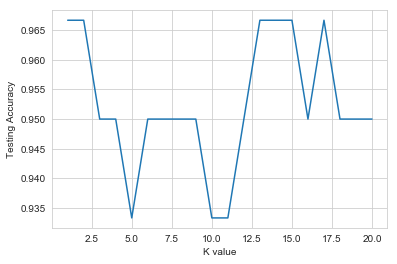

In [63]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')